<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prompt: import file from pc

from google.colab import files

uploaded = files.upload()

Saving modified_Global_Superstore_2018.xlsx to modified_Global_Superstore_2018.xlsx


In [ ]:
data = pd.read_excel("modified_Global_Superstore_2018.xlsx")
data.head(3)

,Index,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,0,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,102.42,39.66,Medium,365.91,0.139952,1247.82,195.87,Very High,2
1,1,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Brian Dahlen,Consumer,Herat,Hirat,...,0.0,104.49,18.72,Medium,27.06,0.429047,447.42,128.85,High,2
2,2,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,13.77,14.10,Medium,115.44,0.039761,1247.82,195.87,High,2


In [ ]:
list(zip(data.columns, data.dtypes))

[('Index', dtype('int64')),
 ('Order ID', dtype('O')),
 ('Order Date', dtype('<M8[ns]')),
 ('Ship Date', dtype('<M8[ns]')),
 ('Delivery Time', dtype('int64')),
 ('Ship Mode', dtype('O')),
 ('Customer Name', dtype('O')),
 ('Segment', dtype('O')),
 ('City', dtype('O')),
 ('State', dtype('O')),
 ('Country', dtype('O')),
 ('Region', dtype('O')),
 ('Product Name', dtype('O')),
 ('Sub-Category', dtype('O')),
 ('Category', dtype('O')),
 ('Sales', dtype('float64')),
 ('Quantity', dtype('int64')),
 ('Discount', dtype('float64')),
 ('Profit', dtype('float64')),
 ('Shipping Cost', dtype('float64')),
 ('Order Priority', dtype('O')),
 ('Sales per Quantity', dtype('float64')),
 ('Profit Margin', dtype('float64')),
 ('Total Sales', dtype('float64')),
 ('Total Profit', dtype('float64')),
 ('Shipping Category', dtype('O')),
 ('Order Priority Numeric', dtype('int64'))]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Obtener nombres de columnas y tipos de datos
columna_info = data.dtypes

# Crear una lista de strings con el formato 'nombre_columnaa: tipo_dato'
columna_info_list = [f"{col}: {dtype}" for col, dtype in columna_info.items()]

# Unir la lista en una sola cadena separada por comas
columna_info_str = ", ".join(columna_info_list)

print(columna_info_str)

Index: int64, Order ID: object, Order Date: datetime64[ns], Ship Date: datetime64[ns], Delivery Time: int64, Ship Mode: object, Customer Name: object, Segment: object, City: object, State: object, Country: object, Region: object, Product Name: object, Sub-Category: object, Category: object, Sales: float64, Quantity: int64, Discount: float64, Profit: float64, Shipping Cost: float64, Order Priority: object, Sales per Quantity: float64, Profit Margin: float64, Total Sales: float64, Total Profit: float64, Shipping Category: object, Order Priority Numeric: int64


In [ ]:
import hashlib

# Función para generar un hash único para cada cliente
def generate_customer_id(row):
    # Obtener las iniciales del nombre del cliente
    initials = ''.join(word[0] for word in row['Customer Name'].split())
    # Combinar iniciales, ciudad y país para formar una cadena única
    unique_string = f"{initials}-{row['City']}-{row['Country']}"
    # Aplicar hash MD5 y devolver los primeros 8 caracteres (para un ID más corto)
    return hashlib.md5(unique_string.encode()).hexdigest()[:8]

# Aplicar la función a cada fila del DataFrame y asignar el resultado a una nueva columna "Customer ID"
data['Customer ID'] = data.apply(generate_customer_id, axis=1)

# # Reordenar las columnas para que "Customer ID" esté antes de "Customer Name"
# cols = data.columns.tolist()
# new_order = ['Customer ID', 'Customer Name', 'City', 'Country']
# data = data[new_order]

# Mostrar el DataFrame con la nueva posición de la columna Customer ID
data.head(3)

,Index,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric,Customer ID
0,0,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,102.42,39.66,Medium,365.91,0.139952,1247.82,195.87,Very High,2,d43965cc
1,1,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Brian Dahlen,Consumer,Herat,Hirat,...,104.49,18.72,Medium,27.06,0.429047,447.42,128.85,High,2,8465dea1
2,2,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,13.77,14.10,Medium,115.44,0.039761,1247.82,195.87,High,2,d43965cc


In [ ]:
# Orden deseado de las columnas
new_order = ['Index', 'Customer ID', 'Customer Name', 'Order ID', 'Order Date', 'Ship Date',
             'Delivery Time', 'Ship Mode', 'Segment', 'City', 'State', 'Country',
             'Region', 'Product Name', 'Sub-Category', 'Category', 'Sales',
             'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
             'Sales per Quantity', 'Profit Margin', 'Total Sales', 'Total Profit',
             'Shipping Category', 'Order Priority Numeric']

# Reordenar las columnas del DataFrame según el nuevo orden
data = data.reindex(columns=new_order)

# Mostrar las primeras 3 filas del DataFrame con el nuevo orden de columnas
data.head(3)

,Index,Customer ID,Customer Name,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Segment,City,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,0,d43965cc,Cathy Armstrong,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Home Office,Herat,...,0.0,102.42,39.66,Medium,365.91,0.139952,1247.82,195.87,Very High,2
1,1,8465dea1,Brian Dahlen,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Consumer,Herat,...,0.0,104.49,18.72,Medium,27.06,0.429047,447.42,128.85,High,2
2,2,d43965cc,Cathy Armstrong,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Home Office,Herat,...,0.0,13.77,14.10,Medium,115.44,0.039761,1247.82,195.87,High,2


In [ ]:
# Crear un ID único para cada nombre de cliente
data['Customer Code'] = data['Customer ID'].astype('category').cat.codes
data.dtypes

Index                              int64
Customer ID                       object
Customer Name                     object
Order ID                          object
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Delivery Time                      int64
Ship Mode                         object
Segment                           object
City                              object
State                             object
Country                           object
Region                            object
Product Name                      object
Sub-Category                      object
Category                          object
Sales                            float64
Quantity                           int64
Discount                         float64
Profit                           float64
Shipping Cost                    float64
Order Priority                    object
Sales per Quantity               float64
Profit Margin                    float64
Total Sales     

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Seleccionar caracteristicas
data_clustering = data[["Total Sales", "Total Profit", "Sales per Quantity"]]
data_clustering.dropna(inplace=True)

# Escalado de caracteristicas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

data_scaled

<ipython-input-11-41ad2569b48d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering.dropna(inplace=True)


array([[ 0.01593966,  0.10422528,  2.5906978 ],
       [-0.53808302, -0.04285257, -0.39265123],
       [ 0.01593966,  0.10422528,  0.38547593],
       ...,
       [-0.84241549, -0.34548137, -0.56267175],
       [-0.7755403 , -0.70741532, -0.17146872],
       [-0.8453808 , -0.33730452, -0.60038953]])

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

df_inertias = pd.DataFrame({"n_clusters": range(1, 11), "inertia": inertia})
df_inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,n_clusters,inertia
0,1,153870.000000
1,2,101363.439524
2,3,79284.172431
3,4,66954.416137
4,5,58018.283324
5,6,51256.329473
6,7,46188.339463
7,8,41225.633546
8,9,38421.050500
9,10,35049.322867


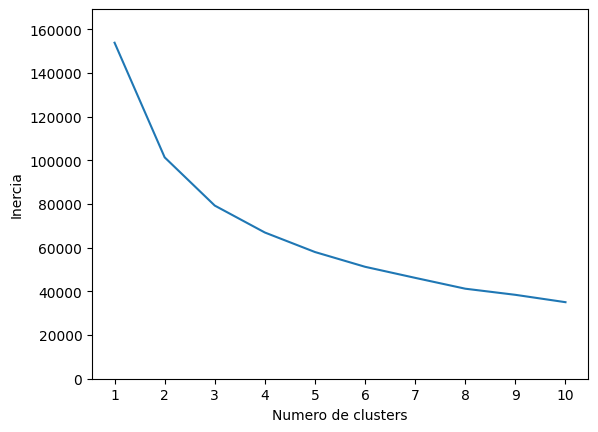

In [ ]:
plt.figure()
plt.plot(df_inertias["n_clusters"], df_inertias["inertia"])
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.ylim((0,1.1 * df_inertias.inertia.max()))
plt.xticks(range(1,11))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

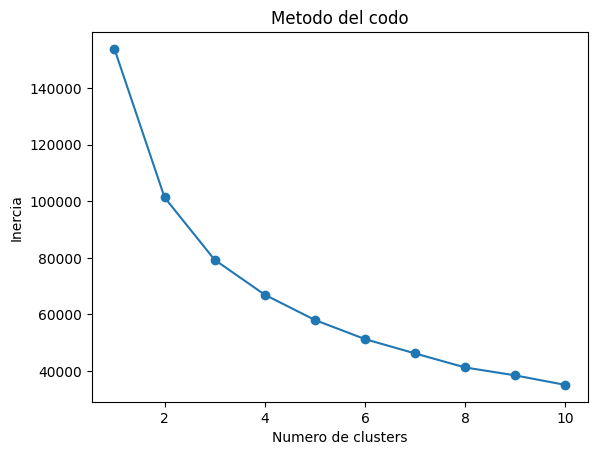

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar el metodo del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el metodo del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.title('Metodo del codo')
plt.show()

In [ ]:
# numpy para operaciones numéricas.
# ones y vstack para crear matrices y apilarlas verticalmente.
# lstsq para resolver problemas de mínimos cuadrados (se utiliza para regresión lineal).

from numpy import ones, vstack
from numpy.linalg import lstsq

# La lista points contiene dos tuplas, cada una representando un punto de datos.
# Cada tupla consta de coordenadas (x, y):
# La coordenada x es el número de clústeres (n_clusters) de un DataFrame llamado df_inertias.
# La coordenada y es el valor de inercia (una medida de calidad de agrupamiento).
points = [
    (df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
    (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]

# La operación zip(*points) separa las coordenadas x e y en listas separadas:
# x_coords contiene las coordenadas x (número de clústeres).
# y_coords contiene las coordenadas y (valores de inercia).

x_coords, y_coords = zip(*points)

# Creación de la Matriz A para Regresión Lineal:
# La matriz A se crea utilizando vstack. Tiene dos columnas: [x_coords, 1].
# La segunda columna está llena de unos (para tener en cuenta el término de intercepción).
# Resolución de los Coeficientes de Regresión Lineal:
# La función lstsq resuelve la ecuación A * [m, b] = y_coords.
# El resultado es un vector [m, b], donde: m es la pendiente (coeficiente para x_coords), b es la ordenada al origen (término constante).

A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond=None)[0]

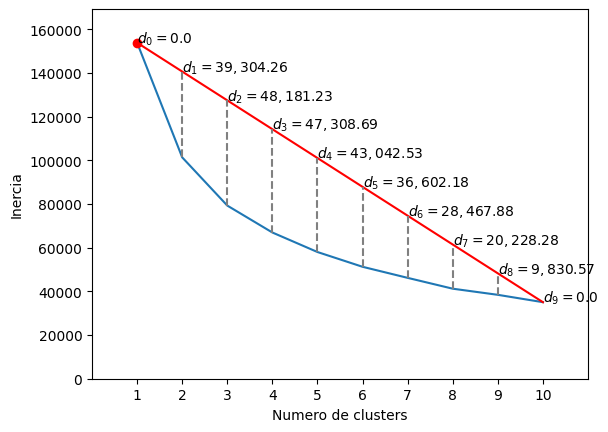

In [ ]:
# Crear una figura
plt.figure()

# Graficar la curva del codo
plt.plot(df_inertias["n_clusters"], df_inertias["inertia"])

# Graficar el primer punto en rojo
plt.plot(df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia, marker='o', color='red')

# Anotar las distancias
for i, r in df_inertias.iterrows():
    d = f"$d_{{{i}}}" + f"= {abs(round(r.inertia - (m * r['n_clusters'] + b), 2)):,}$"
    plt.annotate(d, xytext=(r["n_clusters"], m * r["n_clusters"] + b), xy=(r["n_clusters"], r.inertia))

# Agregar una línea roja que conecta el primer y último punto
plt.plot([df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[-1, :].n_clusters],
         [df_inertias.iloc[0, :].inertia, df_inertias.iloc[-1, :].inertia],
         color='red')

# Agregar líneas verticales punteadas
for i, r in df_inertias.iterrows():
    plt.plot([r["n_clusters"], r["n_clusters"]],
             [r.inertia, m * r["n_clusters"] + b],
             linestyle='--', color='gray')

# Etiquetas y límites
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.xlim((0, 11))
plt.ylim((0, 1.1 * df_inertias.inertia.max()))
plt.xticks(range(1, 11))

# Mostrar la gráfica
plt.show()


La mayor distancia se obtiene k=2, por lo que se toma como mejor numero de k por el metodo del codo.

# Tarea

### Investiga sobre algun otro algoritmo no supervisado que pueda usarse en mi dataset.
### Da un modelo matematico que emplea y explica su conveniencia al usarlo en el dataset.

El Impacto del Machine Learning en las Ventas

El machine learning está revolucionando la forma en que las empresas gestionan sus ventas. A través de técnicas avanzadas de análisis de datos y modelado predictivo, el machine learning ofrece una serie de beneficios clave para el área de ventas:

Pronóstico de Ventas Preciso:
Permite analizar datos históricos de ventas y predecir tendencias futuras con mayor precisión. Esto ayuda a las empresas a tomar decisiones informadas sobre inventario, recursos y estrategias comerciales.

Segmentación de Clientes Eficiente:
Es posible agrupar clientes según sus características y comportamientos. Esto permite personalizar las estrategias de marketing y ventas para cada segmento, maximizando la efectividad de las campañas.

Optimización de Precios en Tiempo Real:
Se puede ajustar los precios automáticamente según la demanda y la competencia. Esto garantiza que los productos se vendan al precio óptimo en cada momento, maximizando los ingresos.

A medida que el sistema aprende de los datos y las interacciones, sus predicciones y decisiones se vuelven más precisas. Esto conduce a una mejora constante en la gestión de ventas.

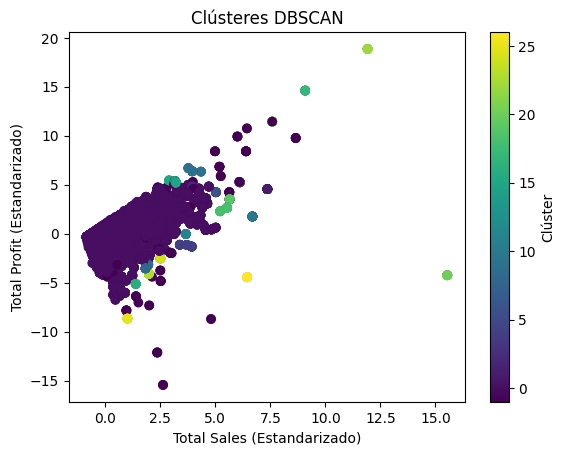

Número de clústeres (excluyendo puntos de ruido): 27
                 Total Sales  Total Profit  Sales per Quantity
DBSCAN_Cluster                                                
-1               6312.582058    748.805056          531.454186
 0               1162.810501    140.894736           68.384878
 1              11864.139000   2220.369000           35.446875
 2               6657.540000   2216.598000          393.112200
 3               6344.272500    894.177500          615.331500
 4               6708.073840   -421.010160           51.957140
 5               7806.831429   1612.427143          445.684286
 6               8482.806000   2076.966000           36.447000
 7              10043.741200   2546.016080           24.892000
 8               3918.157818  -1421.052182           26.929091
 9               6948.500909   3100.862182           38.287273
 10             10880.180000    945.600000           21.097000
 11              6508.850920    130.230920          223.381112
 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes
DBSCAN_columns = ["Total Sales", "Total Profit", "Sales per Quantity"]
X = data[DBSCAN_columns]

# Estandariza las características
DBSCAN_scaler = StandardScaler()
X_DBSCAN_scaled = scaler.fit_transform(X)

# Aplica DBSCAN
eps = 0.5  # Ajusta epsilon (umbral de distancia) según sea necesario
min_samples = 5  # Ajusta min_samples según sea necesario
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_DBSCAN_scaled)

# Agrega etiquetas de clúster al conjunto de datos original
data["DBSCAN_Cluster"] = labels

# Visualiza los clústeres (gráfico de dispersión de dos características)
plt.scatter(X_DBSCAN_scaled[:, 0], X_DBSCAN_scaled[:, 1], c=labels, cmap="viridis")
plt.xlabel("Total Sales (Estandarizado)")
plt.ylabel("Total Profit (Estandarizado)")
plt.title("Clústeres DBSCAN")
plt.colorbar(label="Clúster")
plt.show()

# Imprime el número de clústeres (excluyendo puntos de ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clústeres (excluyendo puntos de ruido): {num_clusters}")

# Opcional: Explora los clústeres en detalle (por ejemplo, ventas promedio en cada clúster)
cluster_summary = data.groupby("DBSCAN_Cluster")[DBSCAN_columns].mean()
print(cluster_summary)


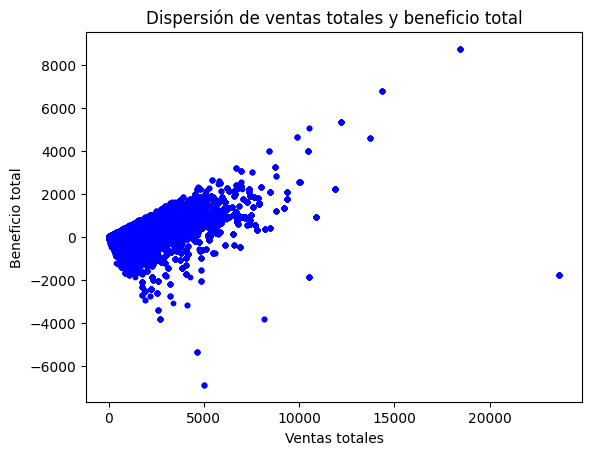

In [ ]:
# prompt: adapt this snipet to my dataset: plt.scatter(df[ :,0 ], df[ :, 1], s=10, c='"blue") and explair in spanish what represent this adapted snippet

plt.scatter(data["Total Sales"], data["Total Profit"], s=10, c="blue")
plt.xlabel("Ventas totales")
plt.ylabel("Beneficio total")
plt.title("Dispersión de ventas totales y beneficio total")
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors

def calculate_kn_distance(X, n_neighbors=2): # Changed parameter name to n_neighbors
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(X)
    distances, _ = nbrs.kneighbors(X)
    return distances[:, n_neighbors - 1] # Use n_neighbors here

def calculate_eps(X, min_samples=5):
    distances = calculate_kn_distance(X, n_neighbors=min_samples + 1) # Pass n_neighbors here
    sorted_distances = np.sort(distances)
    knee_index = np.argmax(sorted_distances[1:] - sorted_distances[:-1]) + 1
    eps = sorted_distances[knee_index]
    return eps

eps = calculate_eps(X_DBSCAN_scaled)
print(f"Valor de epsilon (eps) utilizando el método del codo: {eps}")

Valor de epsilon (eps) utilizando el método del codo: 14.205657890109668


In [ ]:
!pip install kneed # Install the kneed library which contains the Rotor class
from kneed import KneeLocator # Import the KneeLocator class, which is now called KneeLocator

def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, n_neighbors=neigh))
    kneedle = KneeLocator(range(eps_dist.shape[0]), eps_dist, curve="convex", direction="increasing") # Use KneeLocator to find the elbow point
    return kneedle.elbow, eps_dist[kneedle.elbow] # Return the index and value of the elbow point

# Llamando a la funcion principal
idx, eps = get_eps(X_DBSCAN_scaled)
print(f"Valor de epsilon (eps) utilizando el método del codo: {eps}")

Valor de epsilon (eps) utilizando el método del codo: 0.7241361650883357


In [ ]:
# Llamando a la funcion principal
idx, eps = get_eps(X_DBSCAN_scaled)
print(f"Valor de epsilon (eps) utilizando el método del codo: {eps}")


Valor de epsilon (eps) utilizando el método del codo: 0.7241361650883357


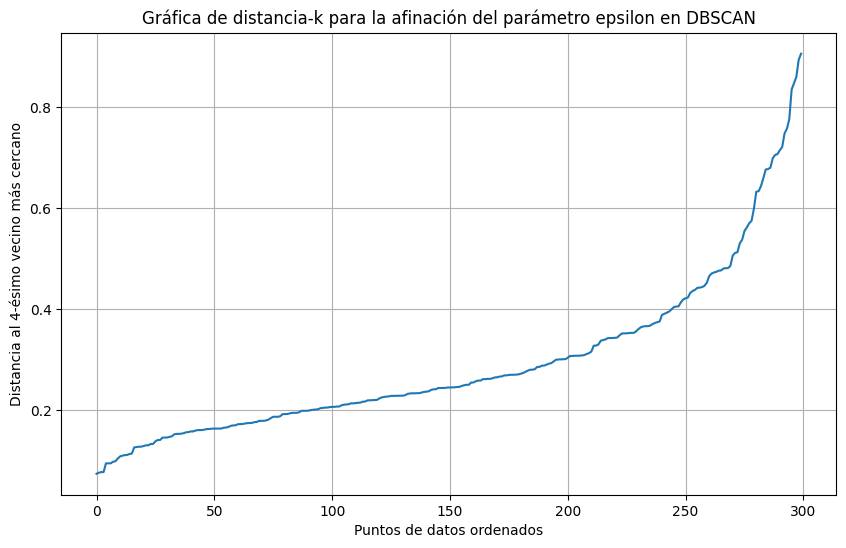

In [ ]:
# Importar librerías necesarias
from sklearn.datasets import make_blobs

# Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Definir el número de vecinos
k = 4

# Calcular las distancias a los k-vecinos más cercanos
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar las distancias (para el k-vecino más cercano)
distances = np.sort(distances[:, k-1], axis=0)

# Graficar la distancia-k
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos de datos ordenados')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.title('Gráfica de distancia-k para la afinación del parámetro epsilon en DBSCAN')
plt.grid(True)
plt.show()

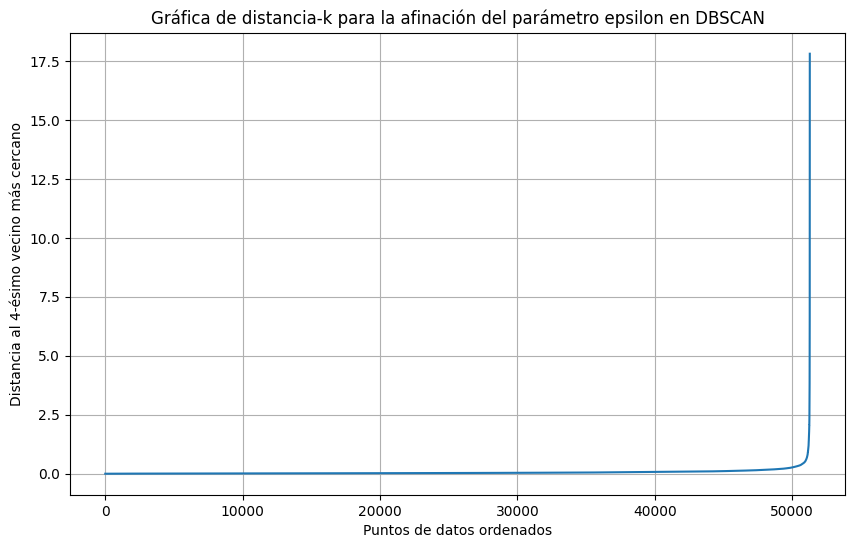

In [ ]:
# Seleccionar las columnas numéricas que serán utilizadas para el clustering
# Reemplaza 'columns_to_use' con las columnas específicas de tu dataset
columns_to_use = ['Total Sales', 'Total Profit', 'Sales per Quantity']  # Añade más columnas según sea necesario
X = data[columns_to_use].values

# Normalización de los datos si es necesario
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el número de vecinos
k = 4

# Calcular las distancias a los k-vecinos más cercanos
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ordenar las distancias (para el k-vecino más cercano)
distances = np.sort(distances[:, k-1], axis=0)

# Graficar la distancia-k
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos de datos ordenados')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.title('Gráfica de distancia-k para la afinación del parámetro epsilon en DBSCAN')
plt.grid(True)
plt.show()


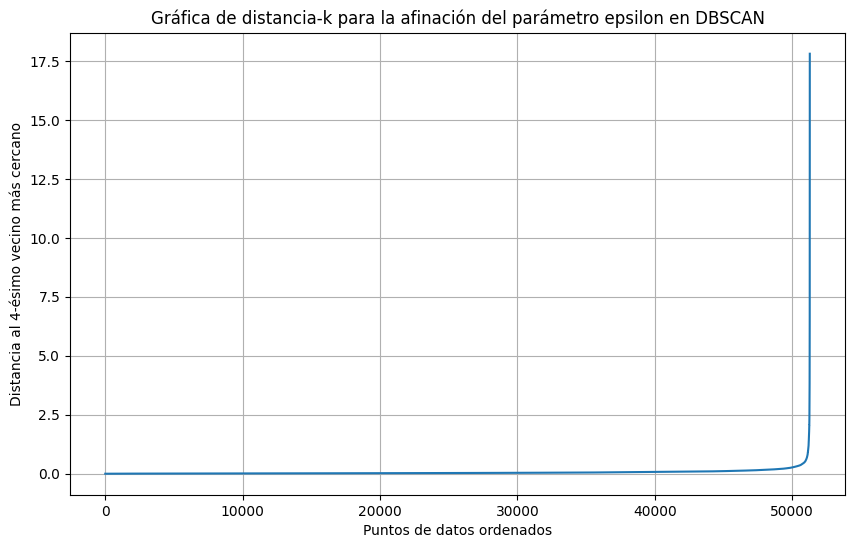

In [ ]:

# Seleccionar las columnas numéricas que serán utilizadas para el clustering
# Reemplaza 'columns_to_use' con las columnas específicas de tu dataset
columns_to_use = ['Total Sales', 'Total Profit', 'Sales per Quantity']  # Añade más columnas según sea necesario

X = data[columns_to_use].values

# Normalización de los datos si es necesario
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el número de vecinos
k = 4

# Calcular las distancias a los k-vecinos más cercanos
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ordenar las distancias (para el k-vecino más cercano)
distances = np.sort(distances[:, k-1], axis=0)

# Graficar la distancia-k
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos de datos ordenados')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.title('Gráfica de distancia-k para la afinación del parámetro epsilon en DBSCAN')
plt.grid(True)
plt.show()


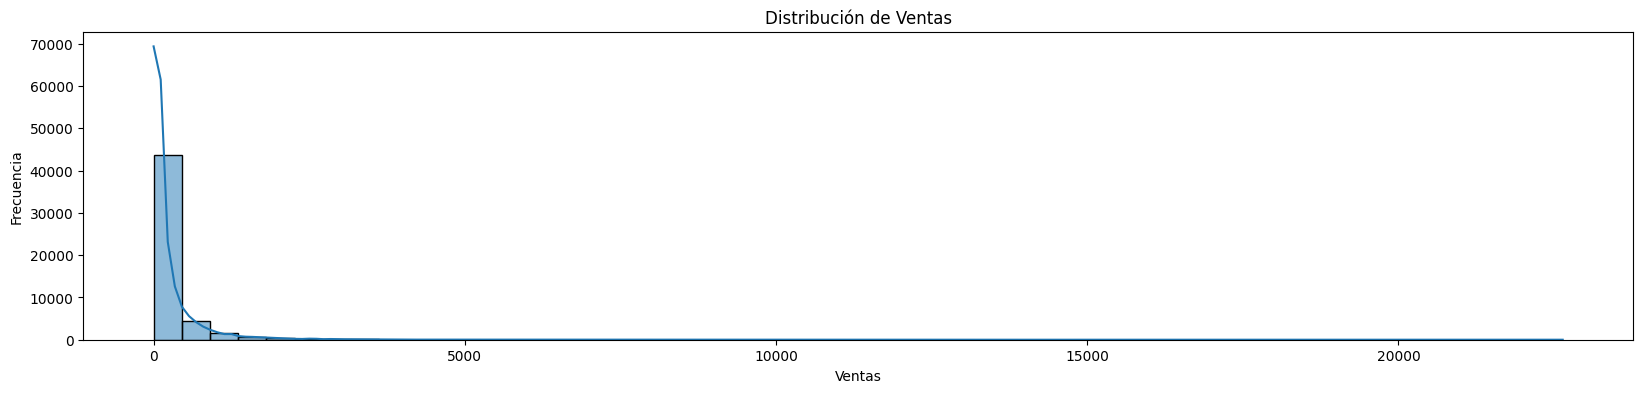

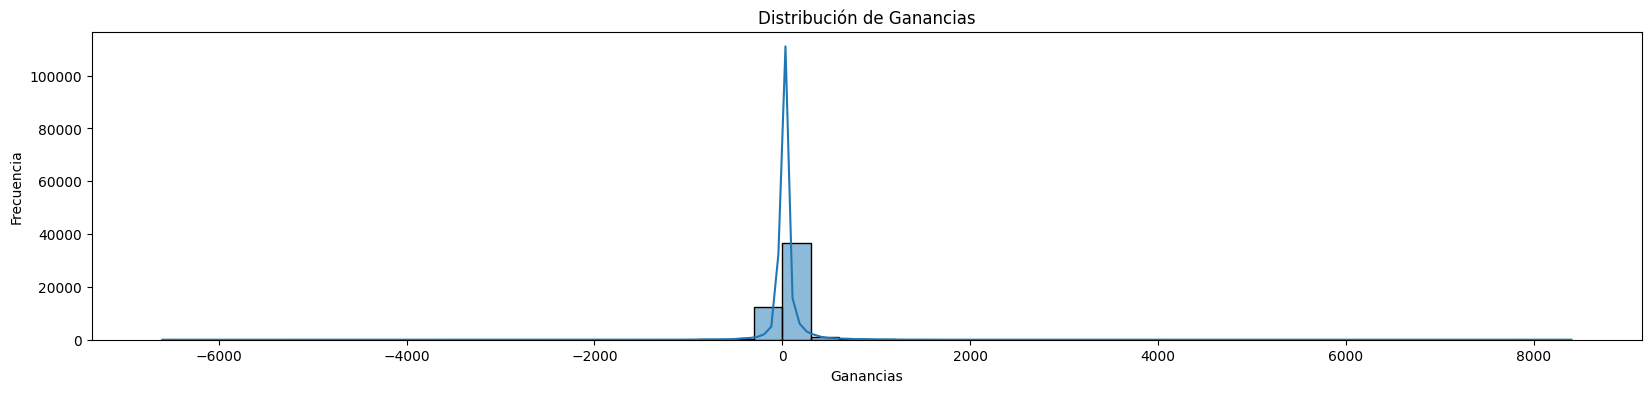

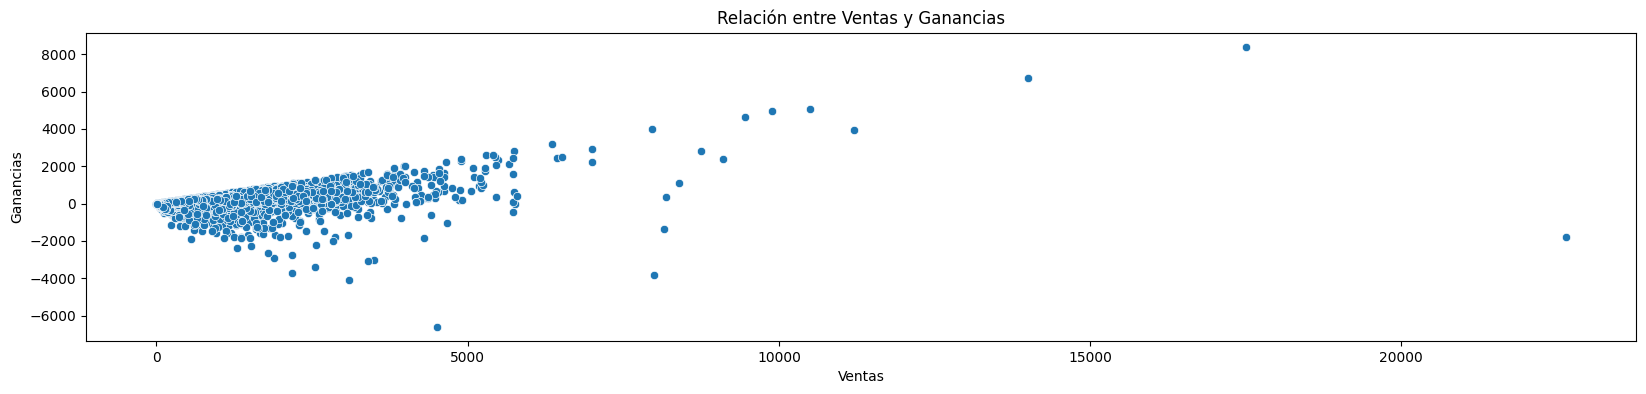

In [ ]:
import seaborn as sns

# Distribución de Ventas
plt.figure(figsize=(20, 4))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Ganancias
plt.figure(figsize=(20, 4))
sns.histplot(data['Profit'], bins=50, kde=True)
plt.title('Distribución de Ganancias')
plt.xlabel('Ganancias')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Ventas y Ganancias
plt.figure(figsize=(20, 4))
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Relación entre Ventas y Ganancias')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

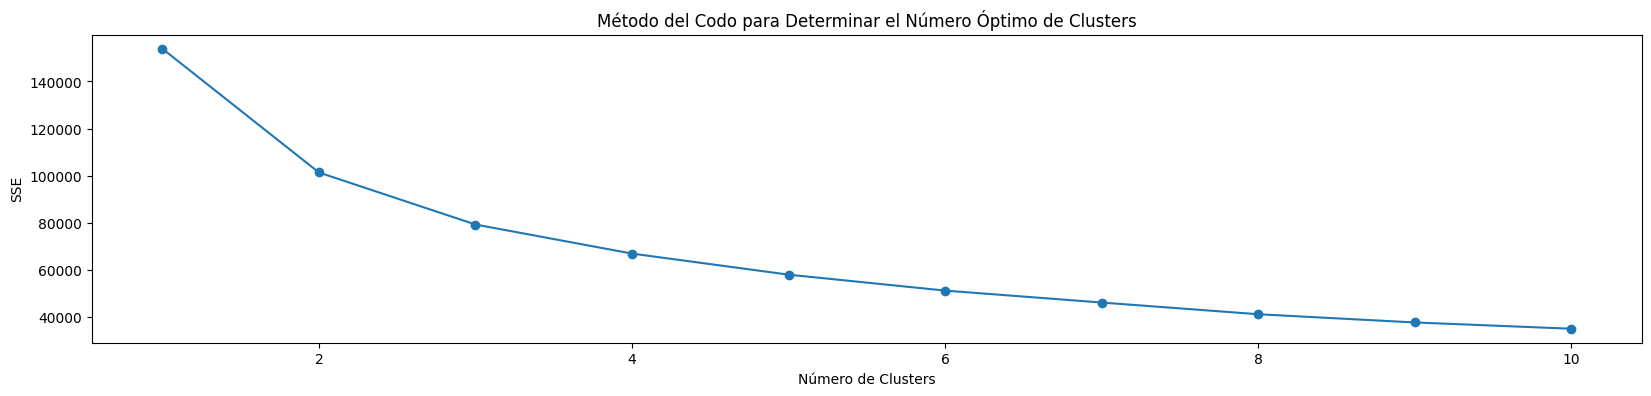

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


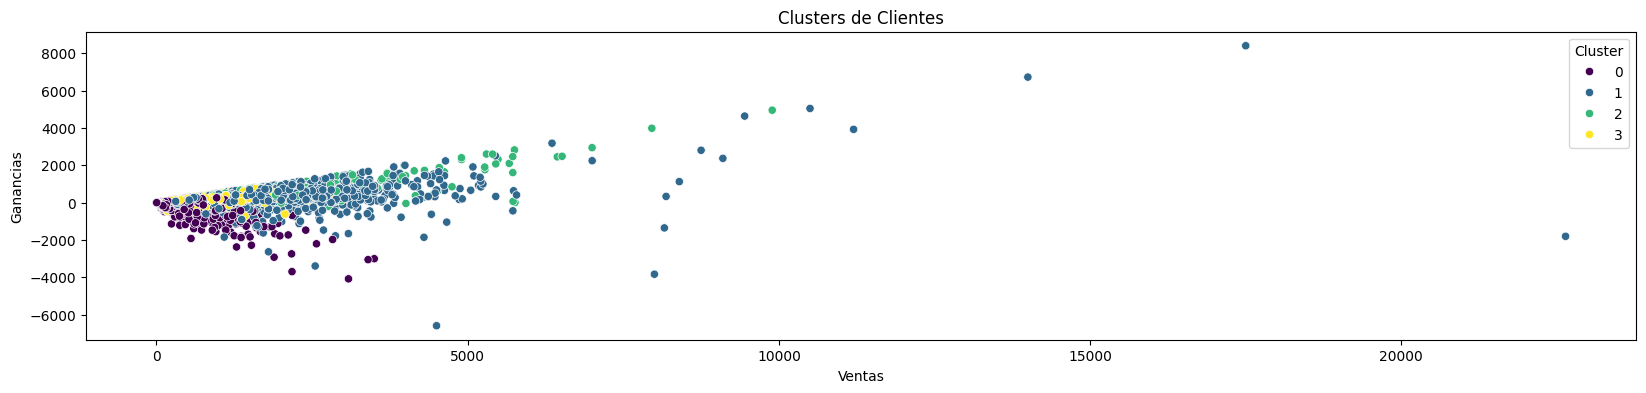

In [37]:
# Determinación del número óptimo de clusters utilizando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(20, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Aplicar K-Means con el número óptimo de clusters (ejemplo con 3 clusters)
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de los clusters
plt.figure(figsize=(20, 4))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

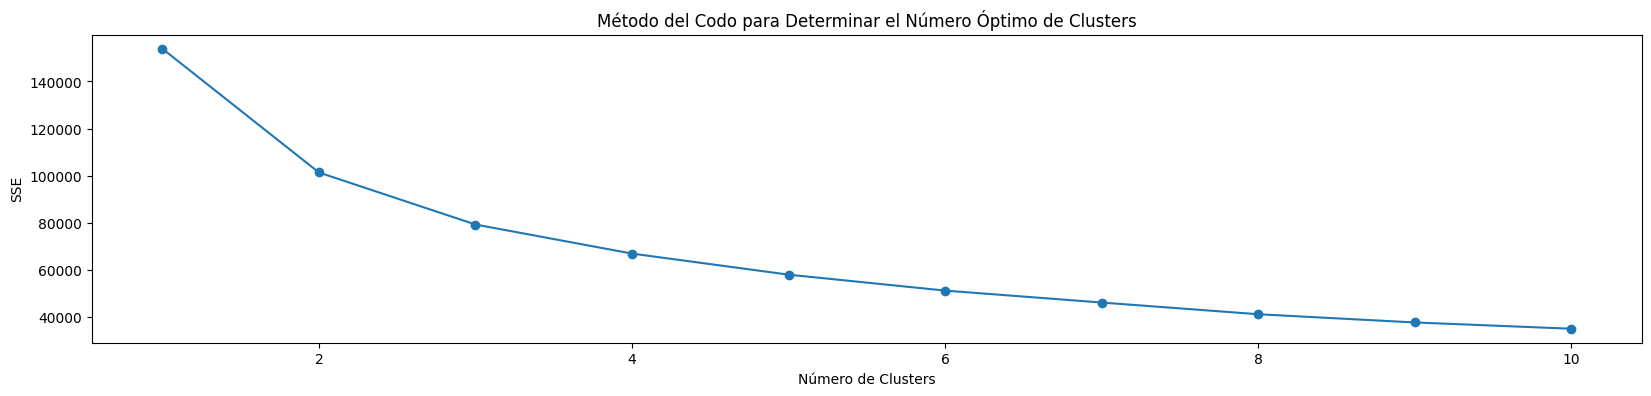

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


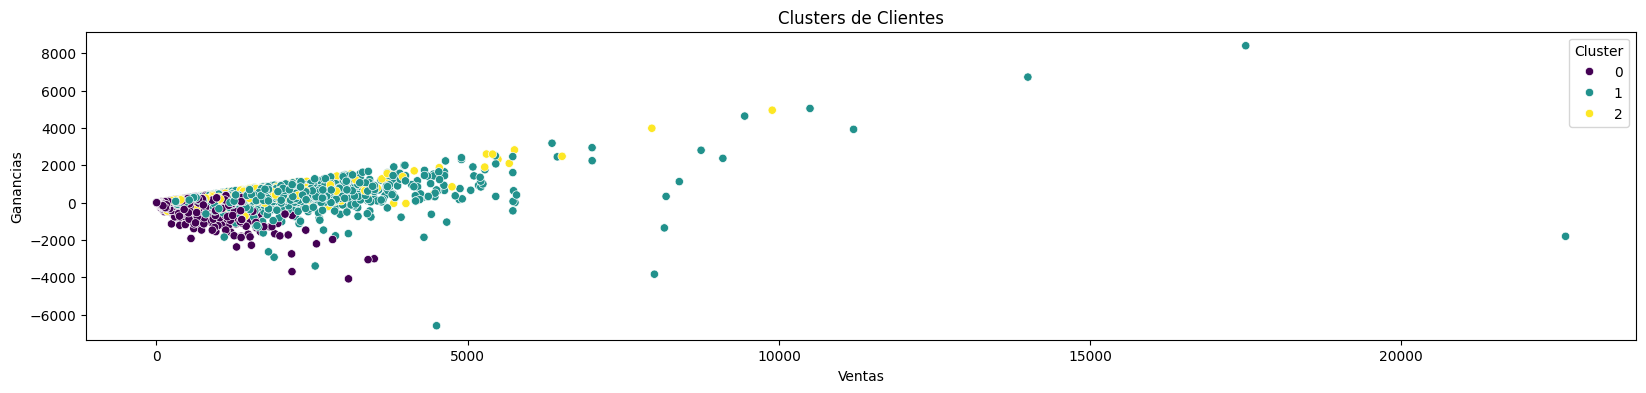

In [39]:
# Determinación del número óptimo de clusters utilizando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(20, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Aplicar K-Means con el número óptimo de clusters (ejemplo con 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de los clusters
plt.figure(figsize=(20, 4))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.show()